In [5]:
# Setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [6]:
# Split dataset

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training KNeighbors

In [6]:
# KNN Classifier with somewhat broad hyperparameter search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [2, 4, 6, 8]}]

knn_clf = KNeighborsClassifier(n_jobs=5)
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=  25.2s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=  25.2s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=  23.7s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=  23.2s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=  23.5s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.970 total time=  24.8s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.971 total time=  23.9s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  24.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  23.8s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.968 total time=  24.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  25.4s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

,estimator,KNeighborsClassifier(n_jobs=5)
,param_grid,"[{'n_neighbors': [2, 4, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [8]:
# KNN Classifier with narrow hyperparameter search
param_grid = [{'weights': ["distance"], 'n_neighbors': [3, 4, 5, 6]}]
knn_clf = KNeighborsClassifier(n_jobs=5)
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  26.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  24.1s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  26.4s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  24.8s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  25.2s
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.973 total time=  25.8s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  23.5s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.970 total time=  24.2s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.971 total time=  24.6s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  24.4s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.970 total time=  23.8s
[CV 2/5] END ...n_neighbors=5, weights=distance;,

,estimator,KNeighborsClassifier(n_jobs=5)
,param_grid,"[{'n_neighbors': [3, 4, ...], 'weights': ['distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.9716166666666666


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=3, scoring="accuracy", n_jobs=5)

array([0.9709 , 0.9698 , 0.97035])

In [ ]:
# does scaling do something? - yes, it makes it worse for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=5)

array([0.9428, 0.9442, 0.9443])

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred_knn = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3, n_jobs=5)

Confusion Matrix:
 [[5884    3    4    0    1    4   17    1    5    4]
 [   1 6706   10    1    3    1    3   10    3    4]
 [  41   47 5716   18   10    5    9   83   18   11]
 [   7   12   29 5891    1   72    6   38   49   26]
 [   3   50    1    1 5636    0   15   16    3  117]
 [  15    8    4   61    6 5218   56    6   17   30]
 [  21   11    1    0    7   22 5853    0    3    0]
 [   3   58   12    2   11    2    0 6109    4   64]
 [  17   68    8   68   29   81   26   13 5477   64]
 [  13    9    5   33   51   13    5   76   13 5731]]
KNN Precision: 0.9705119531184092, Recall: 0.97035, F1 Score: 0.9703052387569183


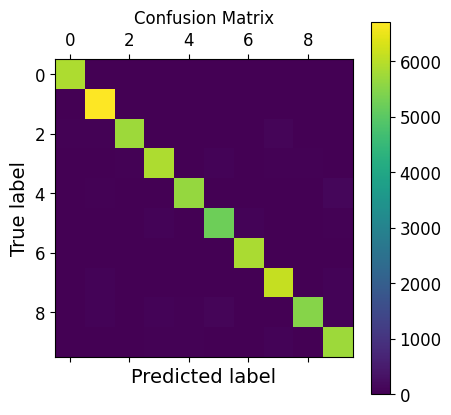

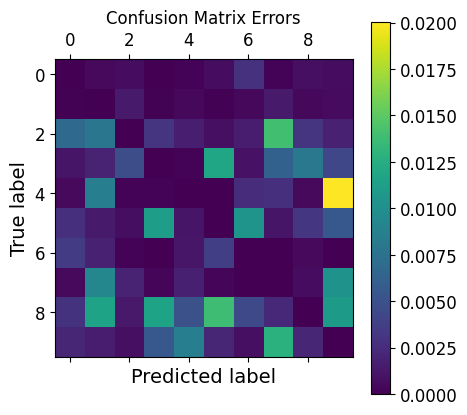

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# confusion matrix for KNN on the best parameters
conf_mx = confusion_matrix(y_train, y_train_pred_knn)
print("Confusion Matrix:\n", conf_mx)

# Precision, Recall and F1 Score for KNN
precision = precision_score(y_train, y_train_pred_knn, average='weighted')
recall = recall_score(y_train, y_train_pred_knn, average='weighted')
f1 = f1_score(y_train, y_train_pred_knn, average='weighted')
print(f"KNN Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# visualize the confusion matrix plot
plt.matshow(conf_mx, cmap='viridis')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.show()

# visualize the confusion matrix errors in colour
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap='viridis')
plt.colorbar()
plt.title("KNN Confusion Matrix Errors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [18]:
# Evaluate on test set
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9714


## Compare with SGD and Random Forest Classifiers

### SGD

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=5)

array([0.87365, 0.85835, 0.8689 ])

In [24]:
# try again with scaling
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=5)

array([0.8983, 0.891 , 0.9018])

In [27]:
# using scaled data
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=5)

Confusion Matrix:
 [[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]
Precision: 0.9075131315075091, Recall: 0.8970333333333333, F1 Score: 0.8995917470760803


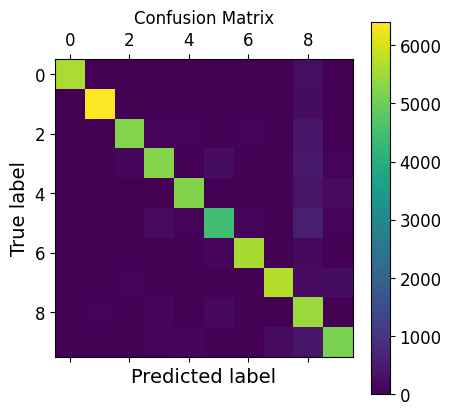

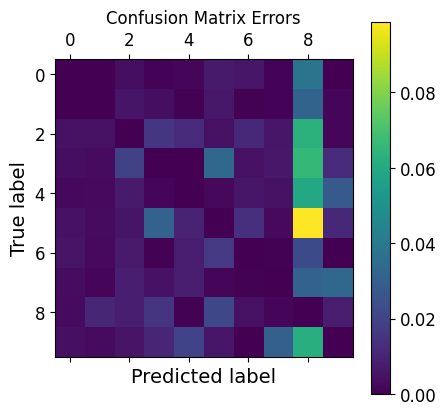

In [ ]:
# Confusion Matrix
conf_mx_sgd = confusion_matrix(y_train, y_train_pred_sgd)
print("Confusion Matrix:\n", conf_mx_sgd)

# Precision, Recall and F1 Score
precision = precision_score(y_train, y_train_pred_sgd, average='weighted')
recall = recall_score(y_train, y_train_pred_sgd, average='weighted')
f1 = f1_score(y_train, y_train_pred_sgd, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# visualize the confusion matrix plot
plt.matshow(conf_mx_sgd, cmap='viridis')
plt.title("SGD Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.show()

# visualize the confusion matrix errors in colour
row_sums = conf_mx_sgd.sum(axis=1, keepdims=True)
norm_conf_mx_sgd = conf_mx_sgd / row_sums
np.fill_diagonal(norm_conf_mx_sgd, 0)
plt.matshow(norm_conf_mx_sgd, cmap='viridis')
plt.colorbar()
plt.title("SGD Confusion Matrix Errors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, n_jobs=5)

In [34]:
# accuracy
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=5)

array([0.9646 , 0.96255, 0.9666 ])

In [ ]:
# try with scaling, is basically the same, minimally worse
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=5)

array([0.96445, 0.96255, 0.96645])

Random Forest Confusion Matrix:
 [[5840    1    8    2    4    9   20    1   35    3]
 [   1 6635   43   11   13    5    6   13   12    3]
 [  27   12 5749   30   32    4   20   37   41    6]
 [   7    7   91 5811    3   63    7   49   61   32]
 [  12   13   14    1 5645    0   28   14   17   98]
 [  20    9    9   64   12 5198   53    6   31   19]
 [  26   11    5    0   12   46 5803    0   15    0]
 [   4   24   58    6   37    1    0 6037   11   87]
 [   9   35   44   52   26   52   27    5 5525   76]
 [  21   10   14   76   75   15    3   58   45 5632]]
Random Forest Precision: 0.9645677791479972, Recall: 0.9645833333333333, F1 Score: 0.9645601142044699


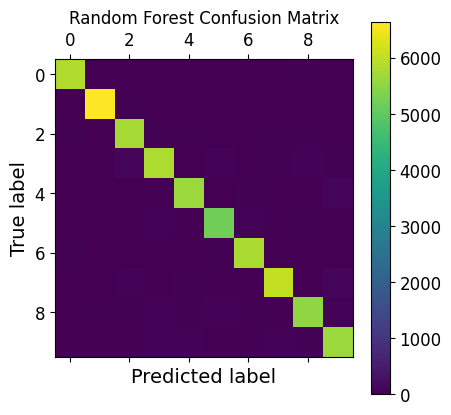

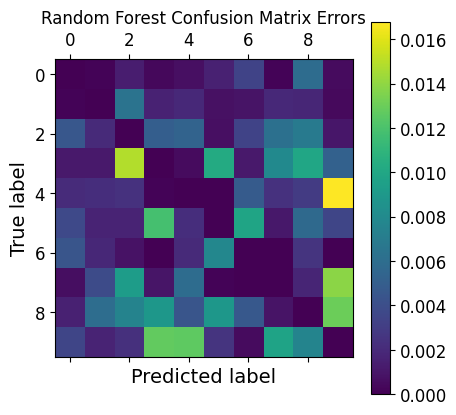

In [33]:
# confusion matrix for Random Forest
conf_mx_forest = confusion_matrix(y_train, y_train_pred_forest)
print("Random Forest Confusion Matrix:\n", conf_mx_forest)

# Precision, Recall and F1 Score for Random Forest
precision_forest = precision_score(y_train, y_train_pred_forest, average='weighted')
recall_forest = recall_score(y_train, y_train_pred_forest, average='weighted')
f1_forest = f1_score(y_train, y_train_pred_forest, average='weighted')
print(f"Random Forest Precision: {precision_forest}, Recall: {recall_forest}, F1 Score: {f1_forest}")

# visualize the confusion matrix plot for Random Forest
plt.matshow(conf_mx_forest, cmap='viridis')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.show()

# visualize the confusion matrix errors in colour for Random Forest
row_sums_forest = conf_mx_forest.sum(axis=1, keepdims=True)
norm_conf_mx_forest = conf_mx_forest / row_sums_forest
np.fill_diagonal(norm_conf_mx_forest, 0)
plt.matshow(norm_conf_mx_forest, cmap='viridis')
plt.colorbar()
plt.title("Random Forest Confusion Matrix Errors")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()